In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
manga = load_dataset('manga.py', trust_remote_code=True, split='train', streaming=True)
manga = iter(manga.with_format('numpy'))

In [8]:
ii = next(manga)

In [9]:
ii

{'object_id': '8485-12701',
 'ra': array(233.31922),
 'dec': array(48.119651),
 'healpix': array(9961),
 'z': array(0.0234253),
 'spaxel_size': array(0.5),
 'spaxel_size_units': 'arcsec',
 'spaxels': array([{'flux': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'ivar': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'mask': array([1024., 1024., 1024., ..., 1024., 1024., 1024.], dtype=float32), 'lsf': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'lambda': array([ 3621.596 ,  3622.43  ,  3623.2642, ..., 10349.038 , 10351.422 ,
               10353.806 ], dtype=float32), 'x': array(0), 'y': array(0), 'spaxel_idx': array(0), 'flux_units': "b'1E-17 erg/s/cm^2/Angstrom/spaxel'", 'lambda_units': "b'Angstrom'"}                                                                                                                                                                          ,
        {'flux': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'ivar': array([0., 0., 0.,

Text(0.5, 1.0, 'Reconstructed r-bad PSF')

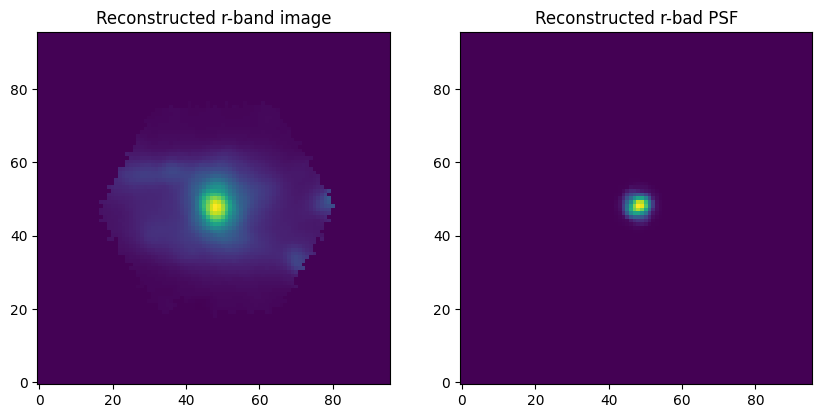

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot r-band image
axs[0].imshow(ii['images'][1]['array'], origin='lower')
axs[0].set_title('Reconstructed r-band image')

# plot r-band psf
axs[1].imshow(ii['images'][1]['psf'], origin='lower')
axs[1].set_title('Reconstructed r-bad PSF')


Text(0.5, 1.0, 'Spaxel at Central Position')

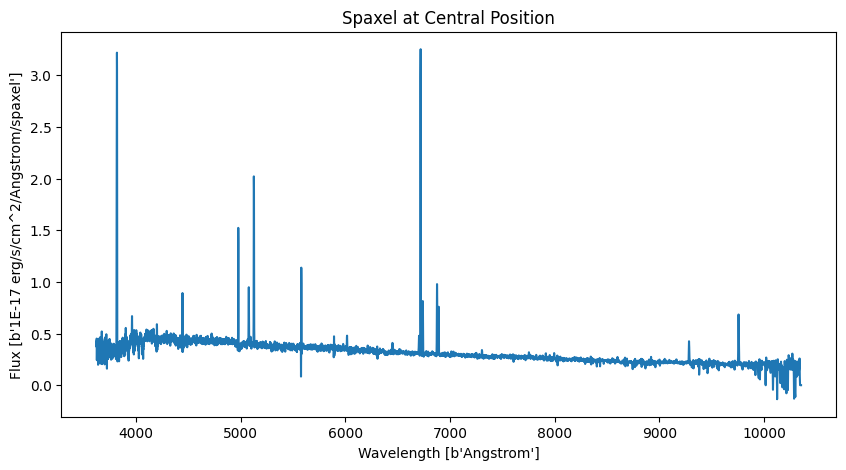

In [15]:
# get the central spaxel
idx = 48 * 96 + 48
spax = ii['spaxels'][idx]

# plot
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(spax['lambda'], spax['flux'])
ax.set_xlabel(f'Wavelength [{spax["lambda_units"]}]')
ax.set_ylabel(f'Flux [{spax["flux_units"]}]')
ax.set_title('Spaxel at Central Position')